In [263]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
import re

In [264]:
train_data = pd.read_csv("train_data.csv",names=["sentiments", "reviews"])

In [265]:
def basic_cleaning(data_frame):
    data_frame['reviews'] = data_frame.reviews.apply(lambda review: review.lower())
    data_frame['reviews'] = data_frame.reviews.apply(lambda review: review.translate(str.maketrans('', '', string.punctuation)))
    data_frame['reviews'] = data_frame.reviews.apply(lambda review: review.translate(str.maketrans('', '', string.digits)))
    data_frame['reviews'] = data_frame.reviews.apply(lambda review: re.sub("r[^a-z]",'',review))

    
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

def tokenize_data(data_frame):
    data_frame['words'] = data_frame.reviews.apply(lambda review: nltk.word_tokenize(review))

from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

def remove_stopwords(list):
    stop_words_removed = []
    for i in list:
        if i not in stopwords:
            stop_words_removed.append(i)
    return stop_words_removed

In [266]:
# nltk.download('all')
#tag part of speech to get more accurate word during lemmatizaton
def tag_pos(list_of_words):
    return nltk.pos_tag(list_of_words)

#extraction of lemma words after pos taggin 
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()

def find_lemma_word(word):
    lemma_words=[]
    words_with_pos = tag_pos(word)
    for word in words_with_pos:
        if word[1].startswith('NN'):
            lemma_words.append(lemmatizer.lemmatize(word[0],pos='n'))
        elif word[1].startswith('VB'):
            lemma_words.append(lemmatizer.lemmatize(word[0],pos='v'))
        elif word[1].startswith('JJ'):
            lemma_words.append(lemmatizer.lemmatize(word[0],pos='a'))
        elif word[1].startswith('RB'):
            lemma_words.append(lemmatizer.lemmatize(word[0],pos='r'))
        else:
            lemma_words.append(word[0])
            
    return lemma_words

In [270]:
basic_cleaning(train_data)
tokenize_data(train_data)
train_data['stop_words_cleaned'] = train_data.words.apply(lambda word_list: remove_stopwords(word_list))
train_data['lemma_word'] = train_data.stop_words_cleaned.apply(lambda word_list: find_lemma_word(word_list))
train_data['cleaned_review'] = train_data.lemma_word.apply(lambda review_list: " ".join(review_list))

In [271]:
train_data

,sentiments,reviews,words,stop_words_cleaned,lemma_word,cleaned_review
0,-1,eat at fioris they said youll like it they sa...,"[eat, at, fioris, they, said, youll, like, it,...","[eat, fioris, said, youll, like, saidnnis, con...","[eat, fioris, say, youll, like, saidnnis, conv...",eat fioris say youll like saidnnis convenientl...
1,-1,i just dont understand the appeal ive tried t...,"[i, just, dont, understand, the, appeal, ive, ...","[dont, understand, appeal, ive, tried, place, ...","[dont, understand, appeal, ive, tried, place, ...",dont understand appeal ive tried place twice t...
2,1,this is my go to place foa really good beef en...,"[this, is, my, go, to, place, foa, really, goo...","[go, place, foa, really, good, beef, enchilada...","[go, place, foa, really, good, beef, enchilada...",go place foa really good beef enchilada red sa...
3,-1,not impressed when i ordered the oyako bowl th...,"[not, impressed, when, i, ordered, the, oyako,...","[impressed, ordered, oyako, bowl, conversation...","[impressed, order, oyako, bowl, conversation, ...",impressed order oyako bowl conversation go som...
4,-1,this is the first time evei wrote a bad review...,"[this, is, the, first, time, evei, wrote, a, b...","[first, time, evei, wrote, bad, review, frustr...","[first, time, evei, write, bad, review, frustr...",first time evei write bad review frustrate her...
...,...,...,...,...,...,...
17995,-1,i was referred to go to this place by a buddy ...,"[i, was, referred, to, go, to, this, place, by...","[referred, go, place, buddy, aftea, conversati...","[refer, go, place, buddy, aftea, conversation,...",refer go place buddy aftea conversation get sh...
17996,1,the food here was really good we started off ...,"[the, food, here, was, really, good, we, start...","[food, really, good, started, garlic, bread, c...","[food, really, good, start, garlic, bread, cov...",food really good start garlic bread cover toma...
17997,1,i eat at this place maybe a week i am die har...,"[i, eat, at, this, place, maybe, a, week, i, a...","[eat, place, maybe, week, die, hard, wing, fan...","[eat, place, maybe, week, die, hard, wing, fan...",eat place maybe week die hard wing fan best ev...
17998,1,phoenix airport is getting betteday by day i ...,"[phoenix, airport, is, getting, betteday, by, ...","[phoenix, airport, getting, betteday, day, pri...","[phoenix, airport, get, betteday, day, primari...",phoenix airport get betteday day primarily use...


In [1528]:
from sklearn.model_selection import train_test_split
train_review, test_review, train_sentiment, test_sentiment =train_test_split(train_data.cleaned_review,train_data.sentiments,shuffle=True,random_state=0,stratify=train_data.sentiments,train_size=.85)

In [1560]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vectorizer = TfidfVectorizer(min_df=.0099,use_idf=False,ngram_range=(1,2))
feature_matrix = tf_vectorizer.fit_transform(train_review)
feature_array = feature_matrix.toarray()

In [1561]:
vocab_list = tf_vectorizer.get_feature_names_out()
vocab_list.shape

(926,)

### Select K-best features

In [1562]:
from sklearn.feature_selection import SelectKBest, chi2

vocab_list = tf_vectorizer.get_feature_names_out()

select_k_best = SelectKBest(score_func=chi2, k= int(len(vocab_list)*.104))
train_sentiment_np_array = np.array(train_sentiment)
select_k_best.fit(feature_array, train_sentiment_np_array)
mask = select_k_best.get_support()
k_best_feature = vocab_list[mask]
k_best_feature

array(['always', 'amaze', 'amazing', 'ask', 'awesome', 'awful', 'az',
       'bad', 'beautiful', 'best', 'bland', 'call', 'charge', 'charlotte',
       'cold', 'could', 'definitely', 'delicious', 'didnt', 'dirty',
       'disappointed', 'disgust', 'dont', 'dry', 'easy', 'enjoy',
       'excellent', 'family', 'fantastic', 'favorite', 'food great',
       'fresh', 'friendly', 'fun', 'give', 'good', 'great', 'great food',
       'great place', 'great service', 'gross', 'happy', 'helpful',
       'highly', 'highly recommend', 'horrible', 'hotel', 'lack', 'leave',
       'little', 'love', 'love place', 'maybe', 'mediocre', 'mexican',
       'minute', 'money', 'nothing', 'ok', 'okay', 'one best', 'order',
       'overprice', 'pay', 'perfect', 'phoenix', 'pittsburgh',
       'recommend', 'rude', 'say', 'seem', 'selection', 'slow', 'sorry',
       'spot', 'staff', 'table', 'taste', 'taste like', 'tell',
       'terrible', 'think', 'two', 'unfortunately', 'us', 'valley',
       'wait', 'waitres

In [1532]:
k_best_feature.shape

(96,)

### Supervised Chi-Square weight for k-best term by utilising target value

In [1533]:
from sklearn.feature_extraction.text import TfidfVectorizer
selected_tf_vectorizer = TfidfVectorizer(use_idf=True, vocabulary=k_best_feature, ngram_range=(1,3))
selected_feat_array = selected_tf_vectorizer.fit_transform(train_review).toarray()
selected_test_array = selected_tf_vectorizer.transform(test_review).toarray()
observed_value_table = pd.DataFrame(selected_tf_vectorizer.get_feature_names_out(), columns=['features'])

In [1534]:
selected_tf_vectorizer.get_feature_names_out()

array(['always', 'amaze', 'amazing', 'ask', 'awesome', 'awful', 'az',
       'bad', 'beautiful', 'best', 'bland', 'call', 'charge', 'charlotte',
       'cold', 'could', 'definitely', 'delicious', 'didnt', 'dirty',
       'disappointed', 'disgust', 'dont', 'dry', 'easy', 'enjoy',
       'excellent', 'family', 'fantastic', 'favorite', 'food great',
       'fresh', 'friendly', 'fun', 'give', 'good', 'great', 'great food',
       'great place', 'great service', 'gross', 'happy', 'helpful',
       'highly', 'highly recommend', 'horrible', 'hotel', 'lack', 'leave',
       'little', 'love', 'love place', 'maybe', 'mediocre', 'mexican',
       'minute', 'money', 'nothing', 'ok', 'okay', 'one best', 'order',
       'overprice', 'pay', 'perfect', 'phoenix', 'pittsburgh',
       'recommend', 'rude', 'say', 'seem', 'selection', 'slow', 'sorry',
       'spot', 'staff', 'table', 'taste', 'taste like', 'tell',
       'terrible', 'think', 'two', 'unfortunately', 'us', 'valley',
       'wait', 'waitres

In [1535]:
tf_data_frame = pd.DataFrame(selected_feat_array,columns = selected_tf_vectorizer.get_feature_names_out())
tf_data_frame['sentiments'] = np.array(train_sentiment)

In [1536]:
observed_value_table['positive_sentiment'] = observed_value_table.features.apply(lambda feature: tf_data_frame.loc[tf_data_frame['sentiments']==1,feature].sum())

In [1537]:
observed_value_table['negative_sentiment'] = observed_value_table.features.apply(lambda feature: tf_data_frame.loc[tf_data_frame['sentiments']==-1,feature].sum())

In [1538]:
observed_value_table['total_row_count'] = observed_value_table['positive_sentiment'] + observed_value_table['negative_sentiment']

In [1539]:
tf_data_frame

,always,amaze,amazing,ask,awesome,awful,az,bad,beautiful,best,...,waitress,wasnt,waste,wine,wonderful,wont,would,wouldnt,yummy,sentiments
0,0.000000,0.0,0.000000,0.2565,0.00000,0.0,0.000000,0.00000,0.0,0.000000,...,0.0,0.147920,0.0,0.0,0.0,0.0,0.206475,0.0,0.0,-1
1,0.000000,0.0,0.000000,0.0000,0.00000,0.0,0.000000,0.00000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,-1
2,0.691753,0.0,0.000000,0.0000,0.45985,0.0,0.000000,0.00000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
3,0.000000,0.0,0.000000,0.0000,0.00000,0.0,0.000000,0.00000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,-1
4,0.000000,0.0,0.000000,0.0000,0.00000,0.0,0.000000,0.00000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15295,0.218450,0.0,0.000000,0.0000,0.00000,0.0,0.000000,0.00000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
15296,0.000000,0.0,0.194003,0.0000,0.00000,0.0,0.214765,0.48234,0.0,0.119564,...,0.0,0.141010,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
15297,0.000000,0.0,0.000000,0.0000,0.00000,0.0,0.000000,0.00000,0.0,0.412954,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,-1
15298,0.000000,0.0,0.000000,0.0000,0.00000,0.0,0.000000,0.00000,0.0,0.000000,...,0.0,0.188643,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,-1


In [1540]:
observed_value_table

,features,positive_sentiment,negative_sentiment,total_row_count
0,always,582.923355,207.962651,790.886006
1,amaze,249.151712,32.806578,281.958290
2,amazing,122.438897,20.381874,142.820770
3,ask,166.796012,411.777213,578.573225
4,awesome,289.426441,56.922014,346.348455
...,...,...,...,...
91,wonderful,159.983000,30.622324,190.605324
92,wont,78.255152,195.282859,273.538010
93,would,362.343986,638.201879,1000.545865
94,wouldnt,45.400138,136.037503,181.437640


In [1541]:
chi_sqare_expected = pd.DataFrame()

#### Calculating expected value table for chi-sqare function

In [1542]:
def chi_sqare_value(row_totals, positive_column_total, negative_column_total, total_sum):
    positive_chi_value = []
    negative_chi_value = []
    for i in range(0, len(row_totals)):
        positive_chi_value.append((row_totals[i]*positive_column_total)/total_sum)
        negative_chi_value.append((row_totals[i]*negative_column_total)/total_sum)
    return positive_chi_value, negative_chi_value

In [1543]:
row_totals = np.array(observed_value_table['total_row_count'])
positive_column_total = observed_value_table['positive_sentiment'].sum()
negative_column_total = observed_value_table['negative_sentiment'].sum()
total_sum = observed_value_table['total_row_count'].sum()
expected_positive, expected_negative = chi_sqare_value(row_totals, positive_column_total, negative_column_total, total_sum)

In [1544]:
chi_sqare_expected['+1'] = np.array(expected_positive)
chi_sqare_expected['-1'] = np.array(expected_negative)

In [1545]:
chi_sqare_expected

,+1,-1
0,385.395267,405.490739
1,137.397033,144.561257
2,69.595932,73.224838
3,281.936184,296.637041
4,168.774076,177.574379
...,...,...
91,92.881135,97.724189
92,133.293867,140.244143
93,487.561593,512.984273
94,88.413763,93.023877


In [1546]:
chi_sqare_table = pd.DataFrame()

In [1547]:
chi_sqare_table['positiev_sentiments'] = ((observed_value_table['positive_sentiment'] - chi_sqare_expected['+1'])**2)/chi_sqare_expected['+1']
chi_sqare_table['negatiev_sentiments'] = ((observed_value_table['negative_sentiment'] - chi_sqare_expected['-1'])**2)/chi_sqare_expected['-1']
chi_sqare_table['sum'] = chi_sqare_table['positiev_sentiments'] + chi_sqare_table['negatiev_sentiments']

In [1548]:
chi_sqare_table

,positiev_sentiments,negatiev_sentiments,sum
0,101.239815,96.222532,197.462347
1,90.897948,86.393191,177.291139
2,40.122731,38.134313,78.257044
3,47.022198,44.691853,91.714051
4,86.251357,81.976878,168.228235
...,...,...,...
91,48.477662,46.075187,94.552849
92,22.726179,21.599906,44.326084
93,32.158909,30.565165,62.724074
94,20.926289,19.889216,40.815504


### Create weighted features

In [1549]:
def generate_chi_sqare_weighted_features(train_feat_array, train_sentiments, chi_weight):
    new_weighted_feature= []
    sentiments = np.array(train_sentiments)
    for i in range(0,len(sentiments)):                
            new_weighted_feature.append(np.multiply(train_feat_array[i], chi_weight))
    return new_weighted_feature        

In [1550]:
def weight_unlabled_data(features, max_chi_val):
    weighted_data = []
    for i in range(0,len(features)):
        weighted_data.append(np.multiply(features[i], max_chi_val))
    return np.array(weighted_data)

In [1551]:
chi_weight = np.array (chi_sqare_table['sum'])
weighted_selected_feat = np.array(
    generate_chi_sqare_weighted_features(selected_feat_array, train_sentiment,chi_weight))

In [1552]:
test_sentiments_array = np.array(test_sentiment)
train_sentiments_array = np.array(train_sentiment)
# chi_sqare_table['max_chi_value'] = find_max_chi_val(chi_sqare_table['positiev_sentiments'], chi_sqare_table['negatiev_sentiments'])
weighted_test_feat = weight_unlabled_data( selected_test_array, chi_weight)
max_neighbour =np.sqrt(int(len(weighted_selected_feat)))
max_neighbour = np.ceil(max_neighbour)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
track_precision=[]
error = []
for i in range(3,60):
    print(i)
    classifer = KNeighborsClassifier(n_neighbors=i,n_jobs=3,weights='distance')
    classifer.fit(weighted_selected_feat, train_sentiments_array)
    sentiments_predict = classifer.predict(weighted_test_feat)
    score = metrics.accuracy_score(test_sentiments_array,sentiments_predict)
    print(score)
    track_precision.append(score)
    error.append(1-score)

In [1554]:
# from sklearn.metrics.pairwise import euclidean_distances
# def calculate_uclidien_distance(train_data, test_data):
#     print("calculate_uclidien_distance in")
#     uc_distance = euclidean_distances([train_data],[test_data])
#     print("calculate_uclidien_distance out")
#     return 1/((np.sqrt(uc_distance))**2)        

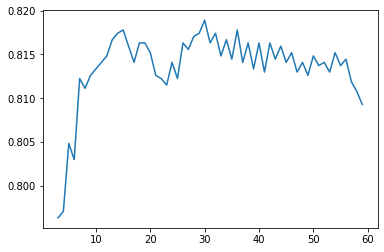

In [1555]:
plt.plot(range(3,60),track_precision)

In [1556]:
# df = pd.DataFrame(weighted_selected_feat)

In [1557]:
def calculate_neighbour(train_data, test_data, K):
    
    numpy_distances = np.array(euclidean_distances(train_data,[test_data]).flatten())
    inv_distance = []
        
    indexes_by_shortest_dist = numpy_distances.argsort()   
    
    return indexes_by_shortest_dist

In [1558]:
def find_majority_and_predict(train_data, test_data, train_sentiments, K):
    
    nearest_neighbors_indexes = calculate_neighbour(train_data, test_data, K)
    sentiment_classes = []
    
    for i in nearest_neighbors_indexes:
        sentiment_classes.append(train_sentiments[i])
        
    return max(sentiment_classes, key=sentiment_classes.count)

In [1559]:
predicted_sentiments = []
print(len(weighted_test_feat))
for i in range(0,len(weighted_test_feat)):
    print(i)
    predicted_sentiments.append(find_majority_and_predict(weighted_selected_feat,weighted_test_feat[i], train_sentiments_array, 24))
    

2700
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


KeyboardInterrupt: 

In [253]:
def find_accuracy(predicted_sentiment, real_sentiment):
    correct_prediction = 0
    for i in range(0,len(predicted_sentiments)):
        if predicted_sentiment[i] == real_sentiment[i]:
            correct_prediction += 1
    return np.divide(correct_prediction, len(predicted_sentiment))

In [254]:
find_accuracy(predicted_sentiments,test_sentiments_array)

0.7344444444444445

In [946]:
result_test_df = pd.read_csv('1661892619_9579706_test_file.csv', names=['reviews'])
basic_cleaning(result_test_df)
tokenize_data(result_test_df)
result_test_df['stop_words_cleaned'] = result_test_df.words.apply(lambda word_list: remove_stopwords(word_list))
result_test_df['lemma_word'] = result_test_df.stop_words_cleaned.apply(lambda word_list: find_lemma_word(word_list))
result_test_df['cleaned_review'] = result_test_df.lemma_word.apply(lambda review_list: " ".join(review_list))
unlabeled_test_feat_matrix = selected_tf_vectorizer.transform(result_test_df['cleaned_review']).toarray()

In [947]:
unlabeled_test_feat_matrix.shape

(18000, 97)

In [ ]:
# def find_max_chi_val(a,b):
#     max_chi = []
#     x = np.array(a)
#     y = np.array(b)
#     for i in range(0, len(x)):
#         max_chi.append(max(x[i],y[i]))
#     return np.array(max_chi)

In [880]:
# chi_sqare_table['max_chi_value'] = find_max_chi_val(chi_sqare_table['positiev_sentiments'], chi_sqare_table['negatiev_sentiments'])
chi_sqare_table

,positiev_sentiments,negatiev_sentiments,sum
0,114.970991,108.849352,223.820342
1,102.306231,96.858928,199.165158
2,47.050478,44.545272,91.595751
3,54.486678,51.585530,106.072208
4,103.908838,98.376204,202.285042
...,...,...,...
89,53.558604,50.706872,104.265477
90,24.489814,23.185852,47.675666
91,37.206026,35.224988,72.431013
92,23.309002,22.067912,45.376914


In [948]:
def weight_unlabled_data(features, max_chi_val):
    weighted_data = []
    for i in range(0,len(features)):
        weighted_data.append(np.multiply(features[i], max_chi_val))
    return np.array(weighted_data)

In [949]:
unlabled_weighted_data = weight_unlabled_data(unlabeled_test_feat_matrix, chi_sqare_table['sum'])

In [950]:
unlabled_weighted_data.shape

(18000, 97)

In [ ]:
predicted_sentiments = []
print(len(unlabled_weighted_data))
for i in range(0,len(unlabled_weighted_data)):
    print(i)
    predicted_sentiments.append(find_majority_and_predict(weighted_selected_feat,unlabled_weighted_data[i], train_sentiments_array, 24))
    

In [951]:
predicted_values = classifer.predict(unlabled_weighted_data)

In [952]:
predicted_values.shape

(18000,)

In [953]:
import csv
outfile = open('./results.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], predicted_values))
outfile.close()

In [954]:
1/(10**2)

0.01